
bn = (yn - y_{n-1})/0.1

0.1*b1 = y1-y0
0.1*b2 = y2-y1
0.1*b3 = y3-y2

A ->
 [[ 1.  0.  0. ...  0.  0.  0.]
 [-1.  1.  0. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ... -1.  1.  0.]
 [ 0.  0.  0. ...  0. -1.  1.]]
b ->
 [10.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4   0.44
  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84  0.88  0.92
  0.96  1.    1.04  1.08  1.12  1.16  1.2   1.24  1.28  1.32  1.36  1.4
  1.44  1.48  1.52  1.56  1.6   1.64  1.68  1.72  1.76  1.8   1.84  1.88
  1.92  1.96  2.    2.04  2.08  2.12  2.16  2.2   2.24  2.28  2.32  2.36
  2.4   2.44  2.48  2.52  2.56  2.6   2.64  2.68  2.72  2.76  2.8   2.84
  2.88  2.92  2.96  3.    3.04  3.08  3.12  3.16  3.2   3.24  3.28  3.32
  3.36  3.4   3.44  3.48  3.52  3.56  3.6   3.64  3.68  3.72  3.76  3.8
  3.84  3.88  3.92  3.96]


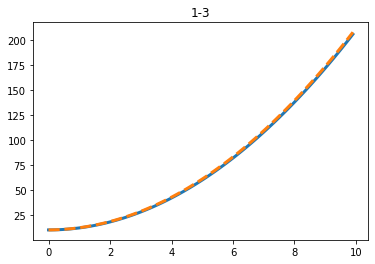


Ainv -> 
 [[1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]]


In [60]:
# 1-1
print('''
bn = (yn - y_{n-1})/0.1

0.1*b1 = y1-y0
0.1*b2 = y2-y1
0.1*b3 = y3-y2
''')

import numpy as np

# 1-2
# bn = yn-y_{n-1}
A = -np.eye(100,k=-1)+np.eye(100)
b = 0.1*4*np.arange(0,10,0.1)
b[0]=10
print('A ->\n',A)
print('b ->\n',b)

# 1-3
for k in range(0,100):
    b[k] = (b[k] - np.dot(A[k,0:k],b[0:k]))/A[k,k]
import matplotlib.pyplot as plt

xr = np.arange(0,10,0.1)
plt.plot(xr,2*xr**2+10,linewidth=3)
plt.plot(xr,b,'--',linewidth=3)
plt.title('1-3')
plt.show()
    
# 1-4

B = np.identity(100)
for k in range(0,100):
    B[k] = (B[k] - np.dot(A[k,0:k],B[0:k]))/A[k,k]
print('\nAinv -> \n',B)


# 1-5

In [90]:
# 2-1
print('''
C ->  y_1         = 6*y_3
H ->  2*y_2       = 12*y_3
O ->  2*y_1 + y_2 = 6*y_3 + 2*y_4
''')

# 2-2

# c=1 -> y1 = 1, y3 = 1/6

A = np.array([[1,0,-6,0],
              [0,2,-12,0],
              [2,1,-6,-2],
              [1,0,0,0]])

b = np.array([0,0,0,1])

# 2-3

import numpy as np
from scipy import linalg

def LUdecomp(a):
    n = len(a)
    for k in range(0,n-1):
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a [i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                a[i,k] = lam
    return a

def LUsolve(a,b):
    n = len(a)
    for k in range(1,n):
        b[k] = b[k] - np.dot(a[k,0:k],b[0:k])
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    
    return b

def inverse(A):
    Acopy = A.copy()
    LU = LUdecomp(Acopy)
    n = len(A)
    X = np.zeros([n,n])
    for i in range(n):
        X[i] = LUsolve(LU, B[:,i])
    return X

B = np.identity(4)
print('L -> \n',sp.linalg.lu(A)[1])
print('U -> \n',sp.linalg.lu(A)[2])
#print(np.linalg.inv(A),inverse(A))

# 2-4
Ainv = np.linalg.inv(A)
b = np.arange(1,2.1,0.2)
#print(Ainv@b)


C ->  y_1         = 6*y_3
H ->  2*y_2       = 12*y_3
O ->  2*y_1 + y_2 = 6*y_3 + 2*y_4

L -> 
 [[ 1.    0.    0.    0.  ]
 [ 0.    1.    0.    0.  ]
 [ 0.5  -0.25  1.    0.  ]
 [ 0.5  -0.25 -0.    1.  ]]
U -> 
 [[  2.   1.  -6.  -2.]
 [  0.   2. -12.   0.]
 [  0.   0.  -6.   1.]
 [  0.   0.   0.   1.]]
